In [1]:
### Load EDA pkgs
import pandas as pd
import numpy as np

### Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

### Feature selection
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
## Model pkgs
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import cv
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
### Load dataset
df = pd.read_csv('./copd_data.csv')
df.head(2)

,subject_id,# of admissions,# of ICU stays,with DM,Age,Sex,CAD,HTN,CKD,Cancer,...,LACTATE,CREAT,Elixhausr,ICU Admission(length of stay ),Hospital Mortality,Renal replacement therapy,Failure,Weight,Height,BMI
0,29156,1,1,0,72,M,0,0,0,0,...,0.9,0.4,0.0,10,1,0,0,60.8,1.60,23.0
1,31288,1,1,0,90,F,1,1,0,0,...,0.9,0.5,0.0,1,0,0,0,80.0,1.73,26.0


### EDA

In [3]:
#### make all column names lower and replace space with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

#### convert sex to 1 or 0 for M or F so that we have numeric values
df['sex'] = df['sex'].replace(['M','F'],[1, 0])

#### Rename ICU admision Length of stay
df.rename(columns = {'icu_admission(length_of_stay_)':'icu_admission(los)'}, inplace = True)


In [4]:
# Creat target labels
targt_label = {"Die":1,"Live":0}

<AxesSubplot:>

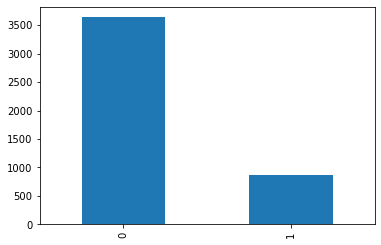

In [5]:
df['hospital_mortality'].value_counts().plot(kind='bar')

<AxesSubplot:>

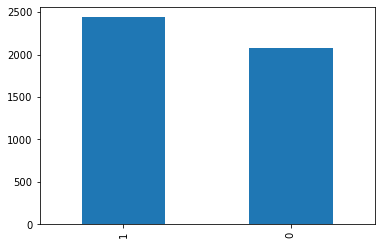

In [6]:
df['sex'].value_counts().plot(kind='bar')

In [7]:
### Age range
df.groupby(['sex','age']).size()
labels = ["< 20","20-30","30-40","40-50","50-60","60-70","70-80","80 >"]
bins= [0,20,30,40,50,60,70,80,90]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()
freq_df = freq_df.reset_index(name='count')
freq_df

,age,count
0,< 20,2
1,20-30,8
2,30-40,26
3,40-50,178
4,50-60,579
5,60-70,1164
6,70-80,1441
7,80 >,1113


<AxesSubplot:>

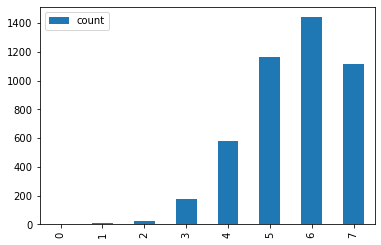

In [8]:
freq_df.plot(kind='bar')

### Narative of this plot
+ There is high prevarance of COPD in nthe age range of 70 - 80 followed by 60 - 70 and then above 80 years

C:\Users\_\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

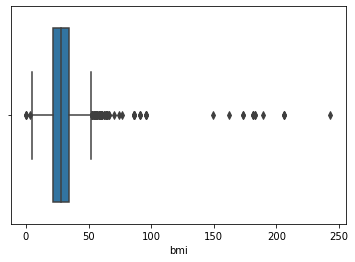

In [9]:
# Outliers on BMI
sns.boxplot(df['bmi'])

In [10]:
out = df[df['height'] ==0]

In [11]:
out

,subject_id,#_of_admissions,#_of_icu_stays,with_dm,age,sex,cad,htn,ckd,cancer,...,lactate,creat,elixhausr,icu_admission(los),hospital_mortality,renal_replacement_therapy,failure,weight,height,bmi
3509,69448,1,1,0,72,0,0,0,0,0,...,2.9,1.4,0.0,1,0,0,1,137.6,0.0,29.947182
3811,27580,1,1,1,76,0,1,1,0,0,...,3.3,0.8,0.0,15,0,0,0,168.2,0.0,29.947182
3812,29135,2,2,0,79,1,0,0,0,0,...,3.3,0.8,0.0,14,1,0,0,168.2,0.0,29.947182
3813,25627,1,1,0,75,0,0,0,0,0,...,3.3,0.8,0.0,11,1,0,0,168.2,0.0,29.947182
3814,10726,1,1,1,66,1,0,1,0,0,...,3.3,0.8,10.0,27,0,0,0,155.0,0.0,29.947182


C:\Users\_\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

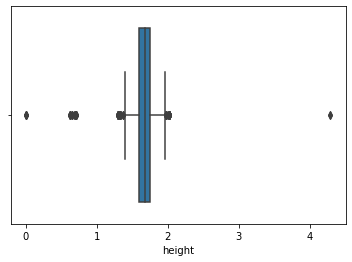

In [12]:
sns.boxplot(df['height'])

In [13]:
median = df.loc[df['height']<2.3, 'height'].median()

df["height"] = np.where(df["height"] >2.3, median,df['height'])
df["height"] = np.where(df["height"] ==0, median,df['height'])


C:\Users\_\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

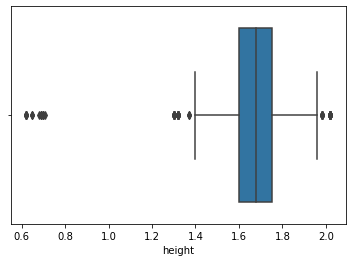

In [14]:
sns.boxplot(df['height'])

In [15]:
bmi_median = df.loc[df['bmi']<60, 'bmi'].median()

df["bmi"] = np.where(df["bmi"] >60, bmi_median,df['bmi'])

C:\Users\_\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

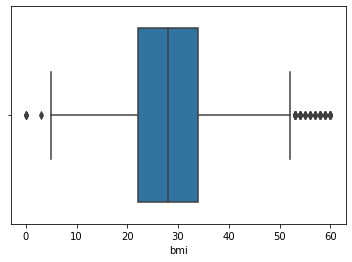

In [16]:
sns.boxplot(df['bmi'])

#### BMI and Height Narration
+ all outliers in height (above 2.3) and bmi (above 60) were replace with mean values


In [17]:
df.isnull().sum()

subject_id                   0
#_of_admissions              0
#_of_icu_stays               0
with_dm                      0
age                          0
sex                          0
cad                          0
htn                          0
ckd                          0
cancer                       0
hba1c                        0
fpg                          0
d1_spo2                      0
d1_sbp                       0
d2_paw                       0
d2_maps                      0
wbc                          0
neut                         0
lactate                      0
creat                        0
elixhausr                    0
icu_admission(los)           0
hospital_mortality           0
renal_replacement_therapy    0
failure                      0
weight                       0
height                       0
bmi                          0
dtype: int64

In [18]:
df.columns

Index(['subject_id', '#_of_admissions', '#_of_icu_stays', 'with_dm', 'age',
       'sex', 'cad', 'htn', 'ckd', 'cancer', 'hba1c', 'fpg', 'd1_spo2',
       'd1_sbp', 'd2_paw', 'd2_maps', 'wbc', 'neut', 'lactate', 'creat',
       'elixhausr', 'icu_admission(los)', 'hospital_mortality',
       'renal_replacement_therapy', 'failure', 'weight', 'height', 'bmi'],
      dtype='object')

### Features

In [19]:
xfeatures = df[['#_of_admissions', '#_of_icu_stays', 'with_dm', 'age','sex', 'cad', 'htn', 'ckd', 'cancer', 
                'hba1c', 'fpg', 'd1_spo2','d1_sbp', 'd2_paw', 'd2_maps', 'wbc', 'neut', 'lactate', 'creat',
                'elixhausr', 'icu_admission(los)','renal_replacement_therapy', 'failure', 'weight', 'height', 'bmi']]
ylabels = df['hospital_mortality']

<AxesSubplot:xlabel='age', ylabel='#_of_admissions'>

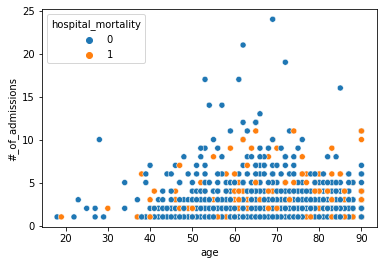

In [20]:
sns.scatterplot(data=df,x='age', y='#_of_admissions', hue='hospital_mortality')

### Train test split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size = 0.3, random_state = 0)

#### Decission Tree

In [22]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.7112259970457903

#### KNearest (KNN)


In [23]:
# knn
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test, y_test)


0.7850812407680945

#### Logistic Regression

In [24]:
logit = LogisticRegression(max_iter=5000, class_weight='balanced',penalty='l2')
logit.fit(x_train,y_train)
logit.score(x_test,y_test)

0.621861152141802

In [25]:
logit.predict(np.array(x_test.values[0]).reshape(1,-1))

array([0], dtype=int64)

In [26]:
print(list(logit.predict(x_test)))
print(list(y_test))

[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 

In [27]:
logit.predict_log_proba(x_test)

array([[-0.23346971, -1.56916765],
       [-0.75115426, -0.63832124],
       [-0.38038589, -1.15074036],
       ...,
       [-0.76641035, -0.62488705],
       [-0.79358226, -0.60188503],
       [-0.70707276, -0.67941287]])

#### Random Forest

In [28]:
rnf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
rnf.fit(x_train,y_train)
rnf.score(x_test,y_test)

0.8124076809453471

In [29]:
print(list(rnf.predict(x_test)))
print(list(y_test))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [57]:
y_train

2188    0
1334    0
169     0
743     0
2804    0
       ..
1033    1
3264    0
1653    0
2607    0
2732    0
Name: hospital_mortality, Length: 3157, dtype: int64

#### Train the XGBoost Classifier

In [30]:
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

In [31]:
largest_class_weight_coef = max(df['hospital_mortality'].value_counts().values)/df.shape[0]
    
#pass y_train as numpy array
weight = CreateBalancedSampleWeights(y_train, largest_class_weight_coef)

In [32]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=xfeatures,label=ylabels)


In [33]:
### declare parameters
params ={'objective':'binary:logistic',
         'max_depth': 4,
         'alpha': 10,
         'learning_rate' : 1.0,
         'n_estimators':100
         }

In [34]:
# instantiate the classfier
xgb_clf = XGBClassifier(learning_rate =0.001,
n_estimators=1000,
weights = weight,
max_depth=18,
min_child_weight=10,
)

## Training XGBoost to the training set
xgb_clf.fit(x_train,y_train)

### score
xgb_clf.score(x_test,y_test)

[20:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8116691285081241

In [35]:
print(list(xgb_clf.predict(x_test)))
print(list(y_test))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
# making predictions on the test data and confusion matrix
y_pred = xgb_clf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Model Accuracy Score:', accuracy_score(y_test,y_pred))

[[1097    3]
 [ 252    2]]
Model Accuracy Score: 0.8116691285081241


In [37]:
y_test.values[0]

0

In [38]:
sample= x_test.iloc[1]

In [39]:
sample

#_of_admissions                2.000000
#_of_icu_stays                 2.000000
with_dm                        0.000000
age                           85.000000
sex                            1.000000
cad                            1.000000
htn                            1.000000
ckd                            1.000000
cancer                         0.000000
hba1c                          6.691162
fpg                          104.000000
d1_spo2                       97.000000
d1_sbp                       117.000000
d2_paw                        21.000000
d2_maps                       14.000000
wbc                           16.400000
neut                          15.400000
lactate                        1.200000
creat                          0.900000
elixhausr                      0.000000
icu_admission(los)             7.000000
renal_replacement_therapy      0.000000
failure                        1.000000
weight                        61.700000
height                         1.420000


In [40]:
sample = pd.DataFrame(x_test.iloc[1]).T

In [41]:
xgb_clf.predict(sample)

array([0], dtype=int64)

####  k-fold Cross Validation using XGBoost

In [42]:
# from xgboost import cv

# params = {'base_score':0.5, 'booster':'gbtree', 'colsample_bylevel':1,
#               'colsample_bynode':1, 'colsample_bytree':1, 'gamma':0,
#               'learning_rate':0.1, 'max_delta_step':0, 'max_depth':3,
#               'min_child_weight':1, 'n_estimators':100, 'n_jobs':1,
#               'objective':'binary:logistic', 'random_state':0,
#               'reg_alpha':0, 'reg_lambda':1, 'scale_pos_weight':1,
#               'subsample':1, 'verbosity':1}
# params = {'learning_rate':0.01,'n_estimators':200,'max_depth':5,'min_child_weight':2,}
# xgb_cv = cv(dtrain=data_dmatrix,params=params,nfold=3,num_boost_round=150,early_stopping_rounds=10,metrics='auc',as_pandas=True,seed=123)

In [56]:
# xgb_cv
x_train

,#_of_admissions,#_of_icu_stays,with_dm,age,sex,cad,htn,ckd,cancer,hba1c,...,neut,lactate,creat,elixhausr,icu_admission(los),renal_replacement_therapy,failure,weight,height,bmi
2188,2,2,1,66,1,1,1,0,0,6.691162,...,5.0,1.6,1.1,0.0,3,0,0,77.8,1.83,23.0
1334,1,1,0,48,1,0,1,0,0,6.400000,...,19.3,2.4,0.9,0.0,2,0,0,122.7,1.70,42.0
169,1,1,1,75,0,0,0,0,0,5.200000,...,1.4,0.9,0.9,0.0,5,0,0,55.2,1.70,19.0
743,1,1,0,61,1,0,0,0,0,7.200000,...,1.8,13.4,1.0,0.0,12,0,1,110.7,1.83,33.0
2804,2,2,0,90,0,1,1,0,0,6.691162,...,14.4,4.5,0.6,0.0,1,0,0,80.0,1.78,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1,1,1,86,0,0,0,0,0,5.600000,...,9.3,0.8,1.4,0.0,2,0,0,54.7,1.63,20.0
3264,1,1,0,68,1,1,1,0,0,6.691162,...,19.7,0.9,2.2,0.0,2,0,1,141.0,1.63,53.0
1653,3,4,0,76,1,1,1,0,0,7.600000,...,2.1,2.8,0.2,0.0,2,0,1,57.5,1.83,17.0
2607,1,1,0,74,0,0,1,0,0,6.691162,...,1.0,1.8,0.5,0.0,2,0,0,76.9,1.57,31.0


In [44]:
### Applying the K-Fold Cross Validation for XGBoost
from xgboost import cv
from sklearn.model_selection import cross_val_score

########
accuracies = cross_val_score(estimator= xgb_clf, X=x_train,y=y_train,cv=10)
print('Accuracy:{:.2f} %'.format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

[20:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:80.33 %
Standard Deviation:0.42 %


#### Catboost

In [45]:
! pip install catboost

In [46]:
# CatBoost
from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(x_train,y_train)
catboost.score(x_test,y_test)

Learning rate set to 0.016832
0:	learn: 0.6854285	total: 136ms	remaining: 2m 15s
1:	learn: 0.6784080	total: 139ms	remaining: 1m 9s
2:	learn: 0.6714436	total: 141ms	remaining: 46.9s
3:	learn: 0.6645951	total: 144ms	remaining: 35.8s
4:	learn: 0.6579008	total: 146ms	remaining: 29.1s
5:	learn: 0.6515966	total: 148ms	remaining: 24.6s
6:	learn: 0.6454217	total: 151ms	remaining: 21.4s
7:	learn: 0.6394713	total: 153ms	remaining: 19s
8:	learn: 0.6337434	total: 155ms	remaining: 17.1s
9:	learn: 0.6286044	total: 158ms	remaining: 15.6s
10:	learn: 0.6231084	total: 160ms	remaining: 14.4s
11:	learn: 0.6180842	total: 163ms	remaining: 13.4s
12:	learn: 0.6124893	total: 165ms	remaining: 12.5s
13:	learn: 0.6078357	total: 167ms	remaining: 11.8s
14:	learn: 0.6034899	total: 170ms	remaining: 11.1s
15:	learn: 0.5991139	total: 172ms	remaining: 10.6s
16:	learn: 0.5950755	total: 175ms	remaining: 10.1s
17:	learn: 0.5911393	total: 178ms	remaining: 9.69s
18:	learn: 0.5871774	total: 180ms	remaining: 9.3s
19:	learn: 0.

0.808714918759232

In [47]:
y_predCat = catboost.predict(x_test)
cm = confusion_matrix(y_test, y_predCat)
print(cm)
accuracy_score(y_test,y_predCat)

[[1092    8]
 [ 251    3]]


0.808714918759232

In [48]:
print(list(y_predCat))
print(list(y_test))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### Model Results
+ Decission tree: 0.707533234859675
+ KNN : 0.7850812407680945
+ Logistic Regression: 0.8124076809453471 (0.6233382570162481 after balancing classes)
+ Random Forest: 0.8124076809453471 (Needs class blancing)
+ XGBoost: 0.8168389955686853 (still the predictions are not convincing)
+ CatBoost: 0.810192023633678 ((Needs class blancing)

In [49]:
!pip install shap


In [50]:
import shap

In [51]:
shap.initjs()

In [52]:
## shap_values
explainer = shap.TreeExplainer(xgb_clf,x_train)
shap_values = explainer.shap_values(x_test)

 99%|===================| 1344/1354 [00:50<00:00]        

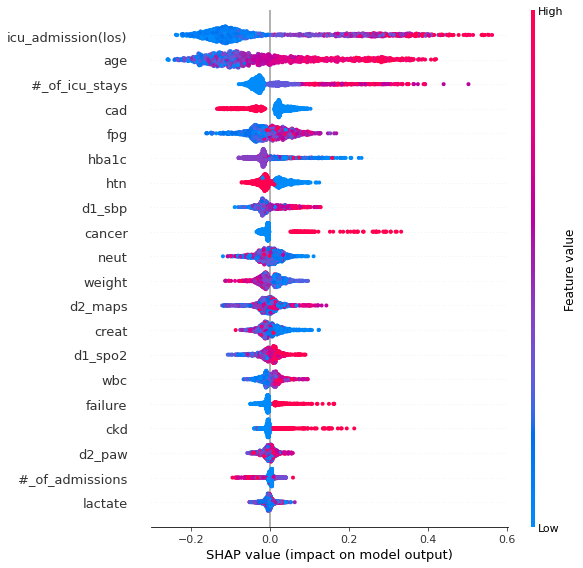

In [53]:
shap.summary_plot(shap_values,x_test)

In [54]:
test = x_test.iloc[0]
# shap.force_plot(explainer.expected_value[0],shap_values[0],x_test[0:10])

In [55]:
x_train

,#_of_admissions,#_of_icu_stays,with_dm,age,sex,cad,htn,ckd,cancer,hba1c,...,neut,lactate,creat,elixhausr,icu_admission(los),renal_replacement_therapy,failure,weight,height,bmi
2188,2,2,1,66,1,1,1,0,0,6.691162,...,5.0,1.6,1.1,0.0,3,0,0,77.8,1.83,23.0
1334,1,1,0,48,1,0,1,0,0,6.400000,...,19.3,2.4,0.9,0.0,2,0,0,122.7,1.70,42.0
169,1,1,1,75,0,0,0,0,0,5.200000,...,1.4,0.9,0.9,0.0,5,0,0,55.2,1.70,19.0
743,1,1,0,61,1,0,0,0,0,7.200000,...,1.8,13.4,1.0,0.0,12,0,1,110.7,1.83,33.0
2804,2,2,0,90,0,1,1,0,0,6.691162,...,14.4,4.5,0.6,0.0,1,0,0,80.0,1.78,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1,1,1,86,0,0,0,0,0,5.600000,...,9.3,0.8,1.4,0.0,2,0,0,54.7,1.63,20.0
3264,1,1,0,68,1,1,1,0,0,6.691162,...,19.7,0.9,2.2,0.0,2,0,1,141.0,1.63,53.0
1653,3,4,0,76,1,1,1,0,0,7.600000,...,2.1,2.8,0.2,0.0,2,0,1,57.5,1.83,17.0
2607,1,1,0,74,0,0,1,0,0,6.691162,...,1.0,1.8,0.5,0.0,2,0,0,76.9,1.57,31.0
